In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import load_img
from keras import optimizers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import glob
import shutil

# custom config
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
'''
src_folder = '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train'
dst_folder = '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train/dogs/'

pattern = src_folder + "/dog.*"
for file in glob.iglob(pattern, recursive=False):
    # extract file name form file path
    file_name = os.path.basename(file)
    shutil.move(file, dst_folder + file_name)
    # print('Moved:', file)
'''

'\nsrc_folder = \'/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train\'\ndst_folder = \'/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train/dogs/\'\n\npattern = src_folder + "/dog.*"\nfor file in glob.iglob(pattern, recursive=False):\n    # extract file name form file path\n    file_name = os.path.basename(file)\n    shutil.move(file, dst_folder + file_name)\n    # print(\'Moved:\', file)\n'

In [2]:
'''
src_folder = '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train/cats'
dst_folder = '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/val/cats/'

pattern = src_folder + "/cat.1????."
for file in glob.iglob(pattern, recursive=False):
    # extract file name form file path
    file_name = os.path.basename(file)
    shutil.move(file, dst_folder + file_name)
    # print('Moved:', file)
'''

'\nsrc_folder = \'/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train/cats\'\ndst_folder = \'/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/val/cats/\'\n\npattern = src_folder + "/cat.1????."\nfor file in glob.iglob(pattern, recursive=False):\n    # extract file name form file path\n    file_name = os.path.basename(file)\n    shutil.move(file, dst_folder + file_name)\n    # print(\'Moved:\', file)\n'

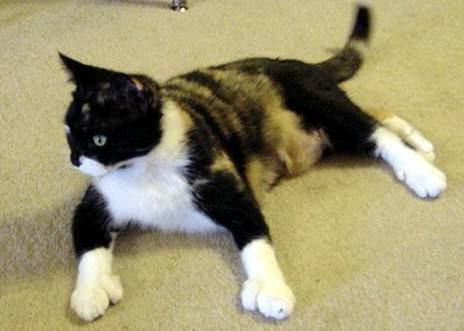

In [6]:
# Check image
path = 'train/cats'
name = 'cat.59.jpg'
fullname = path + '/' + name
load_img(fullname)

In [7]:
input_shape = (150, 150, 3)

model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),input_shape=input_shape))
model.add(Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8),
              metrics=['accuracy'])

2021-11-22 21:15:29.809970: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Q1: 
Since we have a binary classification problem, what is the best loss function for us?

BinaryCrossentropy

#### Q2:
What's the total number of parameters of the model? You can use the summary method for that.

In [25]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 175232)            0         
                                                                 
 dense_12 (Dense)            (None, 64)                11214912  
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train',  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 29s 289ms/step - loss: 0.6847 - accuracy: 0.5590 - val_loss: 0.6775 - val_accuracy: 0.5840
Epoch 2/10
100/100 [==============================] - 34s 343ms/step - loss: 0.6799 - accuracy: 0.5765 - val_loss: 0.6741 - val_accuracy: 0.5850
Epoch 3/10
100/100 [==============================] - 29s 292ms/step - loss: 0.6804 - accuracy: 0.5645 - val_loss: 0.6666 - val_accuracy: 0.6050
Epoch 4/10
100/100 [==============================] - 34s 342ms/step - loss: 0.6706 - accuracy: 0.5800 - val_loss: 0.6816 - val_accuracy: 0.5590
Epoch 5/10
100/100 [==============================] - 31s 311ms/step - loss: 0.6733 - accuracy: 0.5785 - val_loss: 0.6670 - val_accuracy: 0.5970
Epoch 6/10
100/100 [==============================] - 30s 297ms/step - loss: 0.6662 - accuracy: 0.5925 - val_loss: 0.6563 - val_accuracy: 0.6180
Epoch 7/10
100/100 [==============================] - 28s 278ms/step - loss: 0.6591 - accuracy: 0.6040 - val_loss: 0.6559 - val_ac

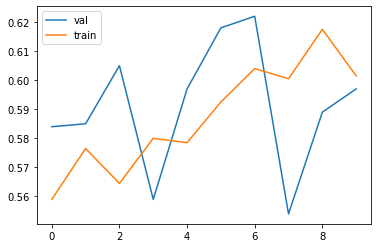

In [35]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [36]:
np.median(history.history['accuracy'])

0.586249977350235

In [37]:
np.std(history.history['loss'])

0.010770234062569037

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
                
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train',  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 38s 380ms/step - loss: 0.6701 - accuracy: 0.5850 - val_loss: 0.6382 - val_accuracy: 0.6450
Epoch 2/10
100/100 [==============================] - 40s 396ms/step - loss: 0.6706 - accuracy: 0.5860 - val_loss: 0.6472 - val_accuracy: 0.6280
Epoch 3/10
100/100 [==============================] - 40s 399ms/step - loss: 0.6623 - accuracy: 0.5850 - val_loss: 0.6883 - val_accuracy: 0.5650
Epoch 4/10
100/100 [==============================] - 33s 333ms/step - loss: 0.6657 - accuracy: 0.6045 - val_loss: 0.6596 - val_accuracy: 0.6070
Epoch 5/10
100/100 [==============================] - 33s 328ms/step - loss: 0.6651 - accuracy: 0.5925 - val_loss: 0.6381 - val_accuracy: 0.6310
Epoch 6/10
100/100 [==============================] - 32s 323ms/step - loss: 0.6660 - accuracy: 0.5985 - val_loss: 0.6397 - val_accuracy: 0.6330
Epoch 7/10
100/100 [==============================] - 33s 329ms/step - loss: 0.6666 - accuracy: 0.5945 - val_loss: 0.6335 - val_ac

In [40]:
np.mean(history.history['val_loss'])

0.6422300100326538

In [41]:
np.mean(history.history['val_accuracy'])

0.6287000000476837